In [1]:
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import normalize
import cv2 as cv
import math

In [2]:
def nondomsort(fitness):
    values1 = []
    values2 = []
    for fit in fitness:
        values1 += [fit[0]]
        values2 += [fit[1]]
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (-values1[p] > -values1[q] and -values2[p] > -values2[q]) or (-values1[p] >= -values1[q] and -values2[p] > -values2[q]) or (-values1[p] > -values1[q] and -values2[p] >= -values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (-values1[q] > -values1[p] and -values2[q] > -values2[p]) or (-values1[q] >= -values1[p] and -values2[q] > -values2[p]) or (-values1[q] > -values1[p] and -values2[q] >= -values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)
    del front[len(front)-1]
    return front

In [6]:
fitness = []
gene = []
dirpos = []
front = []
with open('frontlog.csv', newline='') as csvfile:
    
    reader = csv.reader(csvfile)
    headers = next(reader, None)
    for row in reader:
        if float(row[-2].replace('[','')) < 999999.0:
            front += [int(row[0])]
            fitness += [[float(row[-2].replace('[','')), float(row[-1].replace(']',''))]]
            gene +=[[int(row[1].replace('[','')), int(row[2]),int(row[3]),int(row[4].replace(']',''))]]
            dirpos += [[[int(row[5].replace('[[','')),int(row[6].replace(']',''))],[int(row[7].replace('[','')),int(row[8].replace(']',''))],[int(row[9].replace('[','')),int(row[10].replace(']',''))],[int(row[11].replace('[','')),int(row[12].replace(']]',''))]]]
        print(', '.join(row))

1, [15,  26,  28,  3], [[469,  1068],  [905,  1039],  [1319,  1134],  [1351,  924]], [243.0,  1602.5]
1, [17,  27,  8,  1], [[550,  1068],  [986,  1039],  [1279,  924],  [1270,  924]], [216.0,  1621.16]
1, [5,  27,  4,  12], [[590,  859],  [986,  1039],  [1117,  924],  [1229,  1134]], [212.0,  1718.42]
1, [17,  27,  34,  3], [[550,  1068],  [986,  1039],  [1562,  1134],  [1351,  924]], [214.0,  1687.24]
1, [15,  26,  0,  6], [[469,  1068],  [905,  1039],  [955,  924],  [1432,  1064]], [217.0,  1618.18]
1, [17,  27,  8,  3], [[550,  1068],  [986,  1039],  [1279,  924],  [1351,  924]], [224.0,  1616.34]
2, [12,  14,  22,  18], [[752,  999],  [945,  969],  [1076,  1134],  [1472,  1134]], [267.0,  1609.64]
2, [7,  20,  23,  3], [[590,  1139],  [662,  899],  [1157,  994],  [1351,  924]], [214.0,  1800.08]
2, [3,  14,  3,  17], [[509,  999],  [945,  969],  [1036,  1064],  [1472,  994]], [218.0,  1685.67]
2, [12,  14,  5,  17], [[752,  999],  [945,  969],  [1117,  1064],  [1472,  994]], [224.

In [7]:
front

[1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3]

In [23]:
float(row[-2].replace('[','')), float(row[-1].replace(']',''))

(999999999.0, 999999999.0)

In [27]:
int(row[1].replace('[','')), int(row[2]),int(row[3]),int(row[4].replace(']',''))

(17, 28, 19, 3)

In [33]:
int(row[5].replace('[[','')),int(row[6].replace(']','')),int(row[7].replace('[','')),int(row[8].replace(']','')),int(row[9].replace('[','')),int(row[10].replace(']','')),int(row[11].replace('[','')),int(row[12].replace(']]',''))

(550, 1068, 1067, 1039, 995, 994, 1351, 924)

In [4]:
front = nondomsort(fitness)
values1 = []
values2 = []
for fit in fitness:
    values1 += [fit[0]]
    values2 += [fit[1]]
norm1 = values1 / np.linalg.norm(values1)
norm2 =  values2 / np.linalg.norm(values2)
val = []
for n1,n2 in zip(norm1,norm2):
    val += [math.sqrt(n1**2 + n2**2)]
    

221.0 1589.54
216.0 1621.16


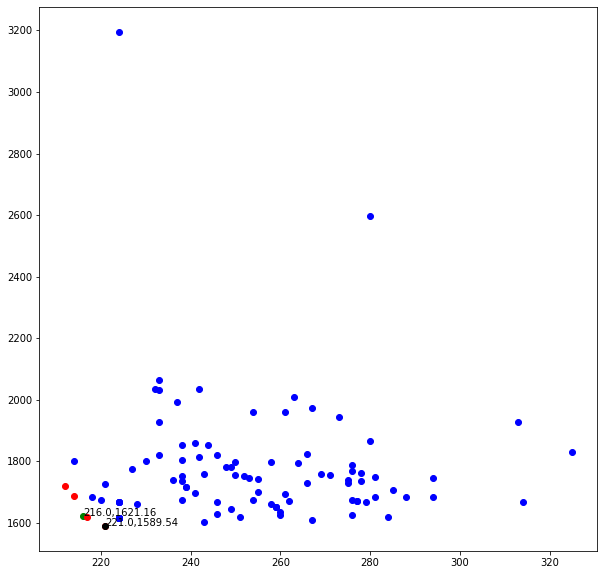

In [30]:
fig,ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
t=0
for i in range(len(front)):
    for j in front[i]:
        if i == 0:
            if min(val) == val[j]:
                ax.plot(values1[j],values2[j],'go')
                ax.annotate((str(values1[j])+','+str(values2[j])), (values1[j], values2[j]))
                t=j
            else:
                ax.plot(values1[j],values2[j],'ro')
        else:
            ax.plot(values1[j],values2[j],'bo')
ax.plot(values1[96],values2[96],'ko')
ax.annotate((str(values1[96])+','+str(values2[96])), (values1[96], values2[96]))
#ax.xlabel('Halo Violations')
#ax.ylabel('Time of operation')
#plt.title('Interesting Graph\nCheck it out')
print(values1[96],values2[96])
print(values1[t],values2[t])

In [36]:
ac1dirx = []
ac1diry = []
ac2dirx = []
ac2diry = []
ac3dirx = []
ac3diry = []
ac4dirx = []
ac4diry = []
for fr in front[1:]:
    for i in fr:
        ac1dirx += [dirpos[i][0][0]]
        ac1diry += [dirpos[i][0][1]]
        ac2dirx += [dirpos[i][1][0]]
        ac2diry += [dirpos[i][1][1]]
        ac3dirx += [dirpos[i][2][0]]
        ac3diry += [dirpos[i][2][1]]
        ac4dirx += [dirpos[i][3][0]]
        ac4diry += [dirpos[i][3][1]]
        
ac1dirx1 = []
ac1diry1 = []
ac2dirx1 = []
ac2diry1 = []
ac3dirx1 = []
ac3diry1 = []
ac4dirx1 = []
ac4diry1 = []
for i in front[1]:
    ac1dirx1 += [dirpos[i][0][0]]
    ac1diry1 += [dirpos[i][0][1]]
    ac2dirx1 += [dirpos[i][1][0]]
    ac2diry1 += [dirpos[i][1][1]]
    ac3dirx1 += [dirpos[i][2][0]]
    ac3diry1 += [dirpos[i][2][1]]
    ac4dirx1 += [dirpos[i][3][0]]
    ac4diry1 += [dirpos[i][3][1]]
    

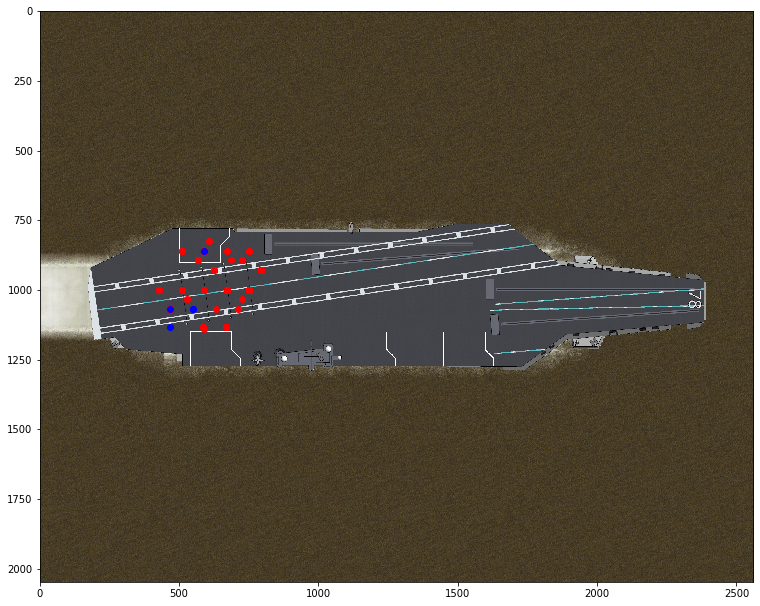

In [10]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)
ax.plot(ac1dirx,ac1diry,'ro')
i = 1
ax.plot(ac1dirx1,ac1diry1,'bo')


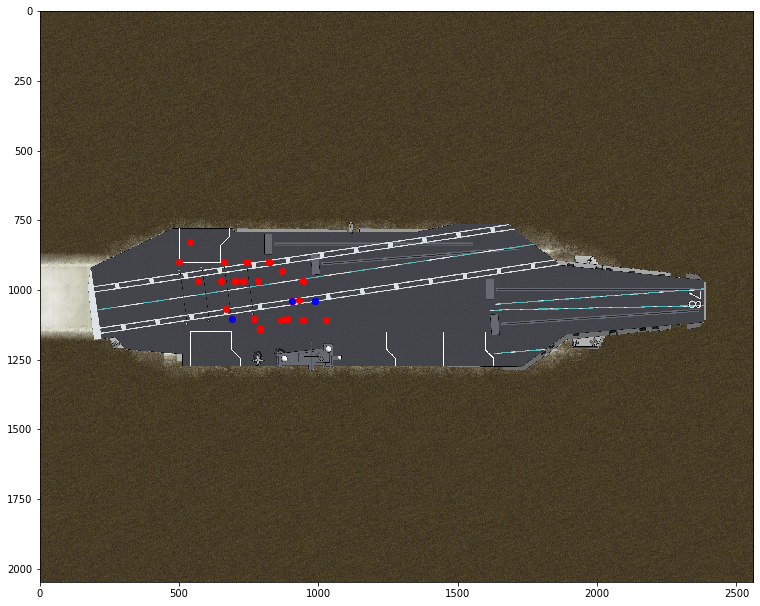

In [11]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)
ax.plot(ac2dirx,ac2diry,'ro')
i = 1
ax.plot(ac2dirx1,ac2diry1,'bo')

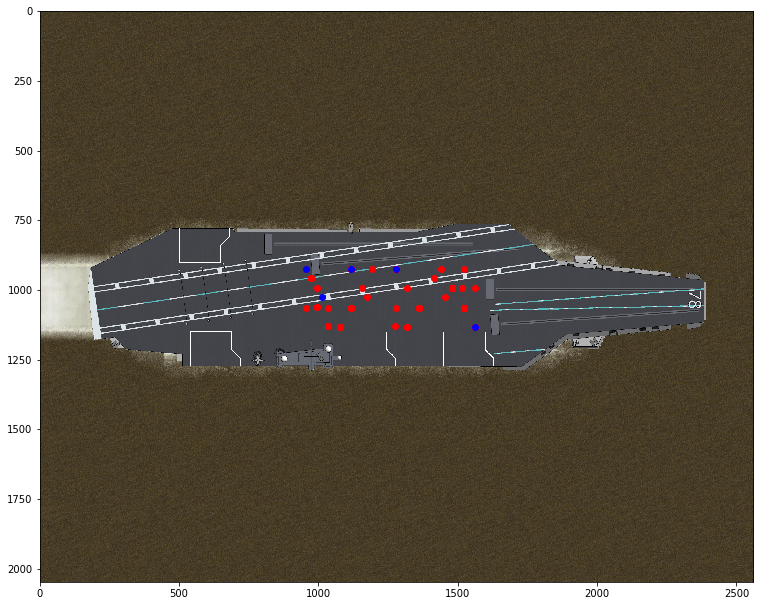

In [12]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)
ax.plot(ac3dirx,ac3diry,'ro')
i = 1
ax.plot(ac3dirx1,ac3diry1,'bo')

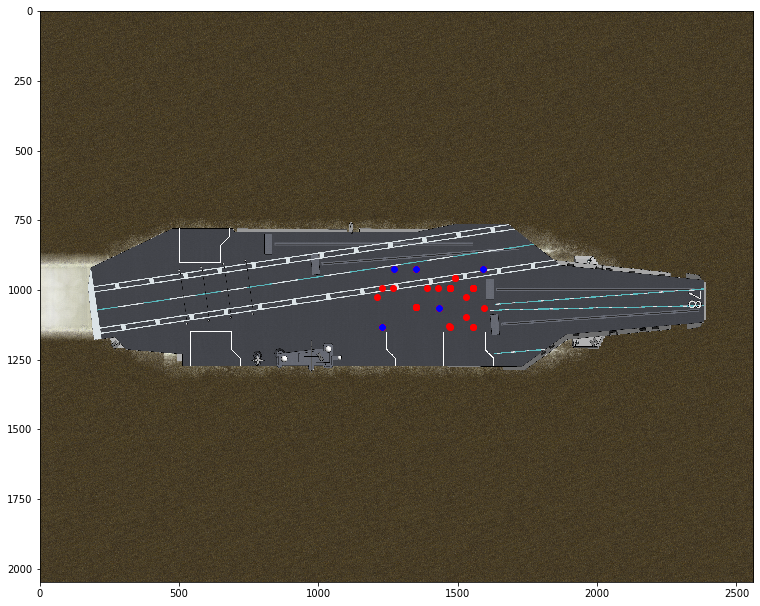

In [13]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)
ax.plot(ac4dirx,ac4diry,'ro')
i = 1
ax.plot(ac4dirx1,ac4diry1,'bo')

587 1135 ro
889 1105 bo
994 1062 go
1529 1027 mo


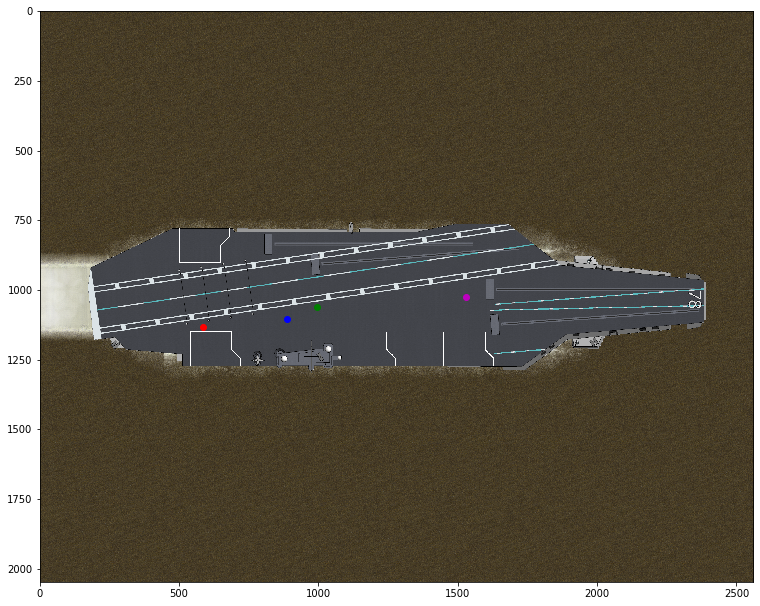

In [54]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)

i = 1
ax.plot(ac1dirx1[i],ac1diry1[i],'ro')
ax.plot(ac2dirx1[i],ac2diry1[i],'bo')
ax.plot(ac3dirx1[i],ac3diry1[i],'go')
ax.plot(ac4dirx1[i],ac4diry1[i],'mo')

print(ac1dirx1[i],ac1diry1[i],'ro')
print(ac2dirx1[i],ac2diry1[i],'bo')
print(ac3dirx1[i],ac3diry1[i],'go')
print(ac4dirx1[i],ac4diry1[i],'mo')

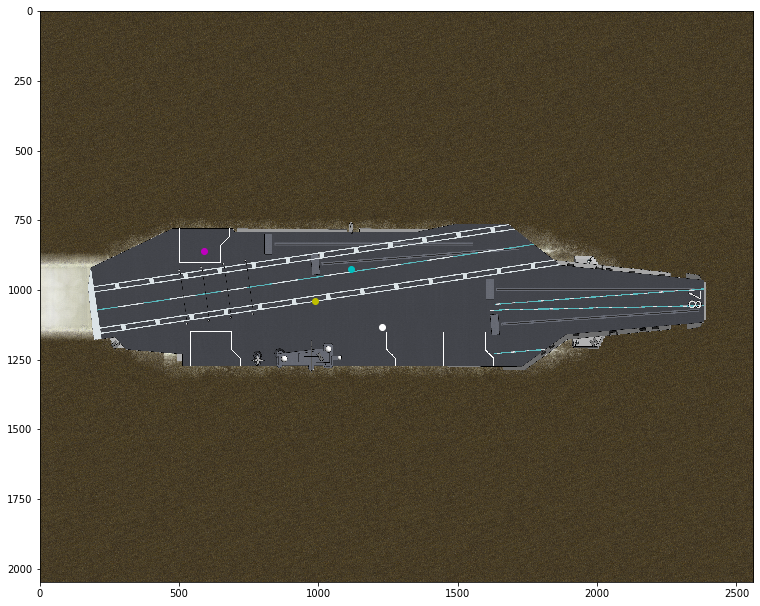

In [103]:
fig,ax = plt.subplots()
img = cv.imread('cvn_full_wake.png')
fig.set_size_inches(18.5, 10.5, forward=True)
ax.imshow(img)
i = 11
ax.plot(ac1dirx[i],ac1diry[i],'mo')
ax.plot(ac2dirx[i],ac2diry[i],'yo')
ax.plot(ac3dirx[i],ac3diry[i],'co')
ax.plot(ac4dirx[i],ac4diry[i],'wo')

In [14]:
front[0]

[49, 61, 72, 73, 96]

In [8]:
values2[96]

1589.54

In [39]:
len(values2)

102